# 导入工具包

In [3]:
import networkx as nx
import numpy as np
import random
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 处理PGN数据为CSV

In [7]:
with open('data/WCC.pgn') as f:
    r = f.readlines()

In [57]:
arr = []
arr_ = {}
for i in r:
    if i.startswith('['):
        tag, value = i[1:-2].split(" ", 1)
        if tag != 'WhiteElo' and tag != 'BlackElo':
            arr_[tag] = value[1:-1]
    elif len(arr_) > 0:
        arr.append(arr_)
        index+=1
        arr_ = {}
    else:
        continue

In [58]:
arr

[{'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.01.11',
  'Round': '1',
  'White': 'Zukertort, Johannes H',
  'Black': 'Steinitz, Wilhelm',
  'Result': '0-1',
  'ECO': 'D11',
  'EventDate': '1886.01.11'},
 {'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.01.13',
  'Round': '2',
  'White': 'Steinitz, Wilhelm',
  'Black': 'Zukertort, Johannes H',
  'Result': '0-1',
  'ECO': 'C47',
  'EventDate': '1886.01.11'},
 {'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.01.15',
  'Round': '3',
  'White': 'Zukertort, Johannes H',
  'Black': 'Steinitz, Wilhelm',
  'Result': '1-0',
  'ECO': 'D10',
  'EventDate': '1886.01.11'},
 {'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.01.18',
  'Round': '4',
  'White': 'Steinitz, Wilhelm',
  'Black': 'Zukertort, Johannes H',
  'Result': '0-1',
  'ECO': 'C67',
  'EventDate': '1886.01.11'},
 {'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.01.20',
  'Round': '5'

In [60]:
df = pd.DataFrame(arr)

In [62]:
df.reindex(columns=['Date', 'EventDate', 'Event', 'Site', 'ECO', 'White', 'Black', 'Rpund', 'Result'])

,Date,EventDate,Event,Site,ECO,White,Black,Rpund,Result
0,1886.01.11,1886.01.11,World Championship 1st,USA,D11,"Zukertort, Johannes H","Steinitz, Wilhelm",NaN,0-1
1,1886.01.13,1886.01.11,World Championship 1st,USA,C47,"Steinitz, Wilhelm","Zukertort, Johannes H",NaN,0-1
2,1886.01.15,1886.01.11,World Championship 1st,USA,D10,"Zukertort, Johannes H","Steinitz, Wilhelm",NaN,1-0
3,1886.01.18,1886.01.11,World Championship 1st,USA,C67,"Steinitz, Wilhelm","Zukertort, Johannes H",NaN,0-1
4,1886.01.20,1886.01.11,World Championship 1st,USA,D10,"Zukertort, Johannes H","Steinitz, Wilhelm",NaN,1-0
...,...,...,...,...,...,...,...,...,...
680,1985.01.21,1984.09.10,World Championship 31th,Moscow RUS,C92,"Kasparov, Gary","Karpov, Anatoly",NaN,1/2-1/2
681,1985.01.23,1984.09.10,World Championship 31th,Moscow RUS,B85,"Karpov, Anatoly","Kasparov, Gary",NaN,1/2-1/2
682,1985.01.28,1984.09.10,World Championship 31th,Moscow RUS,C92,"Kasparov, Gary","Karpov, Anatoly",NaN,1/2-1/2
683,1985.01.30,1984.09.10,World Championship 31th,Moscow RUS,D52,"Karpov, Anatoly","Kasparov, Gary",NaN,0-1


In [63]:
df.to_csv('data/WCC.csv')

# 导入数据，构建MultiDiGraph

In [64]:
df = pd.read_csv('data/WCC.csv')

# 从连接表创建MultiDiGraph多路有向图

In [65]:
G = nx.from_pandas_edgelist(df, 'White', 'Black', edge_attr=True, create_using=nx.MultiDiGraph())

# 初步探索

In [66]:
G.number_of_nodes()

25

In [68]:
G.number_of_edges()

685

In [69]:
G.nodes

NodeView(('Zukertort, Johannes H', 'Steinitz, Wilhelm', 'Chigorin, Mikhail I', 'Gunsberg, Isidor A', 'Lasker, Emanuel', 'Marshall, Frank J', 'Tarrasch, Siegbert', 'Janowski, Dawid M', 'Schlechter, Carl', 'Capablanca, Jose Raul', 'Alekhine, Alexander A', 'Bogoljubow, Efim D', 'Euwe, Max', 'Keres, Paul', 'Smyslov, Vassily V', 'Reshevsky, Samuel H', 'Botvinnik, Mikhail M', 'Bronstein, David I', 'Tal, Mikhail N', 'Petrosian, Tigran V', 'Spassky, Boris V', 'Fischer, Robert J', 'Korchnoi, Viktor L', 'Karpov, Anatoly', 'Kasparov, Gary'))

In [70]:
G.edges(data=True)

OutMultiEdgeDataView([('Zukertort, Johannes H', 'Steinitz, Wilhelm', {'Unnamed: 0': 0, 'Event': 'World Championship 1st', 'Site': 'USA', 'Date': '1886.01.11', 'Round': 1, 'Result': '0-1', 'ECO': 'D11', 'EventDate': '1886.01.11'}), ('Zukertort, Johannes H', 'Steinitz, Wilhelm', {'Unnamed: 0': 2, 'Event': 'World Championship 1st', 'Site': 'USA', 'Date': '1886.01.15', 'Round': 3, 'Result': '1-0', 'ECO': 'D10', 'EventDate': '1886.01.11'}), ('Zukertort, Johannes H', 'Steinitz, Wilhelm', {'Unnamed: 0': 4, 'Event': 'World Championship 1st', 'Site': 'USA', 'Date': '1886.01.20', 'Round': 5, 'Result': '1-0', 'ECO': 'D10', 'EventDate': '1886.01.11'}), ('Zukertort, Johannes H', 'Steinitz, Wilhelm', {'Unnamed: 0': 6, 'Event': 'World Championship 1st', 'Site': 'USA', 'Date': '1886.02.05', 'Round': 7, 'Result': '0-1', 'ECO': 'D40', 'EventDate': '1886.01.11'}), ('Zukertort, Johannes H', 'Steinitz, Wilhelm', {'Unnamed: 0': 8, 'Event': 'World Championship 1st', 'Site': 'USA', 'Date': '1886.02.10', 'Roun

In [72]:
G.get_edge_data('Zukertort, Johannes H', 'Steinitz, Wilhelm')

{0: {'Unnamed: 0': 0,
  'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.01.11',
  'Round': 1,
  'Result': '0-1',
  'ECO': 'D11',
  'EventDate': '1886.01.11'},
 1: {'Unnamed: 0': 2,
  'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.01.15',
  'Round': 3,
  'Result': '1-0',
  'ECO': 'D10',
  'EventDate': '1886.01.11'},
 2: {'Unnamed: 0': 4,
  'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.01.20',
  'Round': 5,
  'Result': '1-0',
  'ECO': 'D10',
  'EventDate': '1886.01.11'},
 3: {'Unnamed: 0': 6,
  'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.02.05',
  'Round': 7,
  'Result': '0-1',
  'ECO': 'D40',
  'EventDate': '1886.01.11'},
 4: {'Unnamed: 0': 8,
  'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.02.10',
  'Round': 9,
  'Result': '0-1',
  'ECO': 'D26',
  'EventDate': '1886.01.11'},
 5: {'Unnamed: 0': 10,
  'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.03.01',
  'R

# 初步可视化

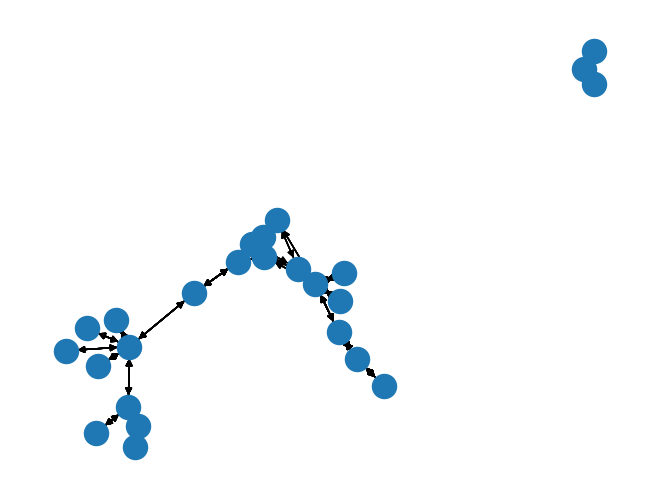

In [73]:
pos = nx.spring_layout(G, seed=123)
nx.draw(G, pos)

# 联通与分析

In [74]:
H = G.to_undirected()

In [75]:
for each in nx.connected_components(H):
    print(f'连通域\n{H.subgraph(each)}\n包含节点\n{each}\n')

连通域
MultiGraph with 22 nodes and 304 edges
包含节点
{'Alekhine, Alexander A', 'Lasker, Emanuel', 'Keres, Paul', 'Bogoljubow, Efim D', 'Petrosian, Tigran V', 'Fischer, Robert J', 'Steinitz, Wilhelm', 'Marshall, Frank J', 'Zukertort, Johannes H', 'Tarrasch, Siegbert', 'Spassky, Boris V', 'Schlechter, Carl', 'Botvinnik, Mikhail M', 'Janowski, Dawid M', 'Chigorin, Mikhail I', 'Gunsberg, Isidor A', 'Euwe, Max', 'Smyslov, Vassily V', 'Capablanca, Jose Raul', 'Reshevsky, Samuel H', 'Bronstein, David I', 'Tal, Mikhail N'}

连通域
MultiGraph with 3 nodes and 49 edges
包含节点
{'Kasparov, Gary', 'Karpov, Anatoly', 'Korchnoi, Viktor L'}



# 高级可视化

In [78]:
H = nx.Graph(G)

In [79]:
H.edges()

EdgeView([('Zukertort, Johannes H', 'Steinitz, Wilhelm'), ('Steinitz, Wilhelm', 'Chigorin, Mikhail I'), ('Steinitz, Wilhelm', 'Gunsberg, Isidor A'), ('Steinitz, Wilhelm', 'Lasker, Emanuel'), ('Lasker, Emanuel', 'Marshall, Frank J'), ('Lasker, Emanuel', 'Tarrasch, Siegbert'), ('Lasker, Emanuel', 'Janowski, Dawid M'), ('Lasker, Emanuel', 'Schlechter, Carl'), ('Lasker, Emanuel', 'Capablanca, Jose Raul'), ('Capablanca, Jose Raul', 'Alekhine, Alexander A'), ('Alekhine, Alexander A', 'Bogoljubow, Efim D'), ('Alekhine, Alexander A', 'Euwe, Max'), ('Euwe, Max', 'Keres, Paul'), ('Euwe, Max', 'Smyslov, Vassily V'), ('Euwe, Max', 'Botvinnik, Mikhail M'), ('Euwe, Max', 'Reshevsky, Samuel H'), ('Keres, Paul', 'Smyslov, Vassily V'), ('Keres, Paul', 'Botvinnik, Mikhail M'), ('Keres, Paul', 'Reshevsky, Samuel H'), ('Smyslov, Vassily V', 'Reshevsky, Samuel H'), ('Smyslov, Vassily V', 'Botvinnik, Mikhail M'), ('Reshevsky, Samuel H', 'Botvinnik, Mikhail M'), ('Botvinnik, Mikhail M', 'Bronstein, David I')

In [80]:
len(G.get_edge_data('Zukertort, Johannes H', 'Steinitz, Wilhelm'))

10

In [96]:
edgewidth = [len(G.get_edge_data(u, v)) for u, v in H.edges()]

In [97]:
edgewidth

[10,
 19,
 10,
 9,
 7,
 8,
 11,
 5,
 7,
 17,
 26,
 27,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 3,
 37,
 2,
 12,
 21,
 11,
 23,
 11,
 25,
 24]

In [86]:
wins = dict.fromkeys(G.nodes(), 0)
for (u, v, d) in G.edges(data=True):
    r = d['Result'].split('-')
    if r[0] == '1':
        wins[u] += 1.0
    elif r[0] == '1/2':
        wins[u] += 0.5
        wins[v] += 0.5
    else:
        wins[v] += 1
nodesize = [wins[v] * 50 for v in H]

In [87]:
wins

{'Zukertort, Johannes H': 7.5,
 'Steinitz, Wilhelm': 53.0,
 'Chigorin, Mikhail I': 17.0,
 'Gunsberg, Isidor A': 8.5,
 'Lasker, Emanuel': 61.5,
 'Marshall, Frank J': 3.5,
 'Tarrasch, Siegbert': 5.5,
 'Janowski, Dawid M': 3.5,
 'Schlechter, Carl': 5.0,
 'Capablanca, Jose Raul': 24.5,
 'Alekhine, Alexander A': 79.5,
 'Bogoljubow, Efim D': 20.0,
 'Euwe, Max': 29.0,
 'Keres, Paul': 10.5,
 'Smyslov, Vassily V': 46.0,
 'Reshevsky, Samuel H': 10.5,
 'Botvinnik, Mikhail M': 89.0,
 'Bronstein, David I': 12.0,
 'Tal, Mikhail N': 20.5,
 'Petrosian, Tigran V': 35.5,
 'Spassky, Boris V': 32.5,
 'Fischer, Robert J': 12.5,
 'Korchnoi, Viktor L': 23.0,
 'Karpov, Anatoly': 52.0,
 'Kasparov, Gary': 23.0}

In [88]:
nodesize

[375.0,
 2650.0,
 850.0,
 425.0,
 3075.0,
 175.0,
 275.0,
 175.0,
 250.0,
 1225.0,
 3975.0,
 1000.0,
 1450.0,
 525.0,
 2300.0,
 525.0,
 4450.0,
 600.0,
 1025.0,
 1775.0,
 1625.0,
 625.0,
 1150.0,
 2600.0,
 1150.0]

In [89]:
pos = nx.kamada_kawai_layout(H)

In [91]:
# Manual tweaking to limit node label overlap in the visualization
pos["Reshevsky, Samuel H"] += (0.05, -0.10)
pos["Botvinnik, Mikhail M"] += (0.03, -0.06)
pos["Smyslov, Vassily V"] += (0.05, -0.03)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


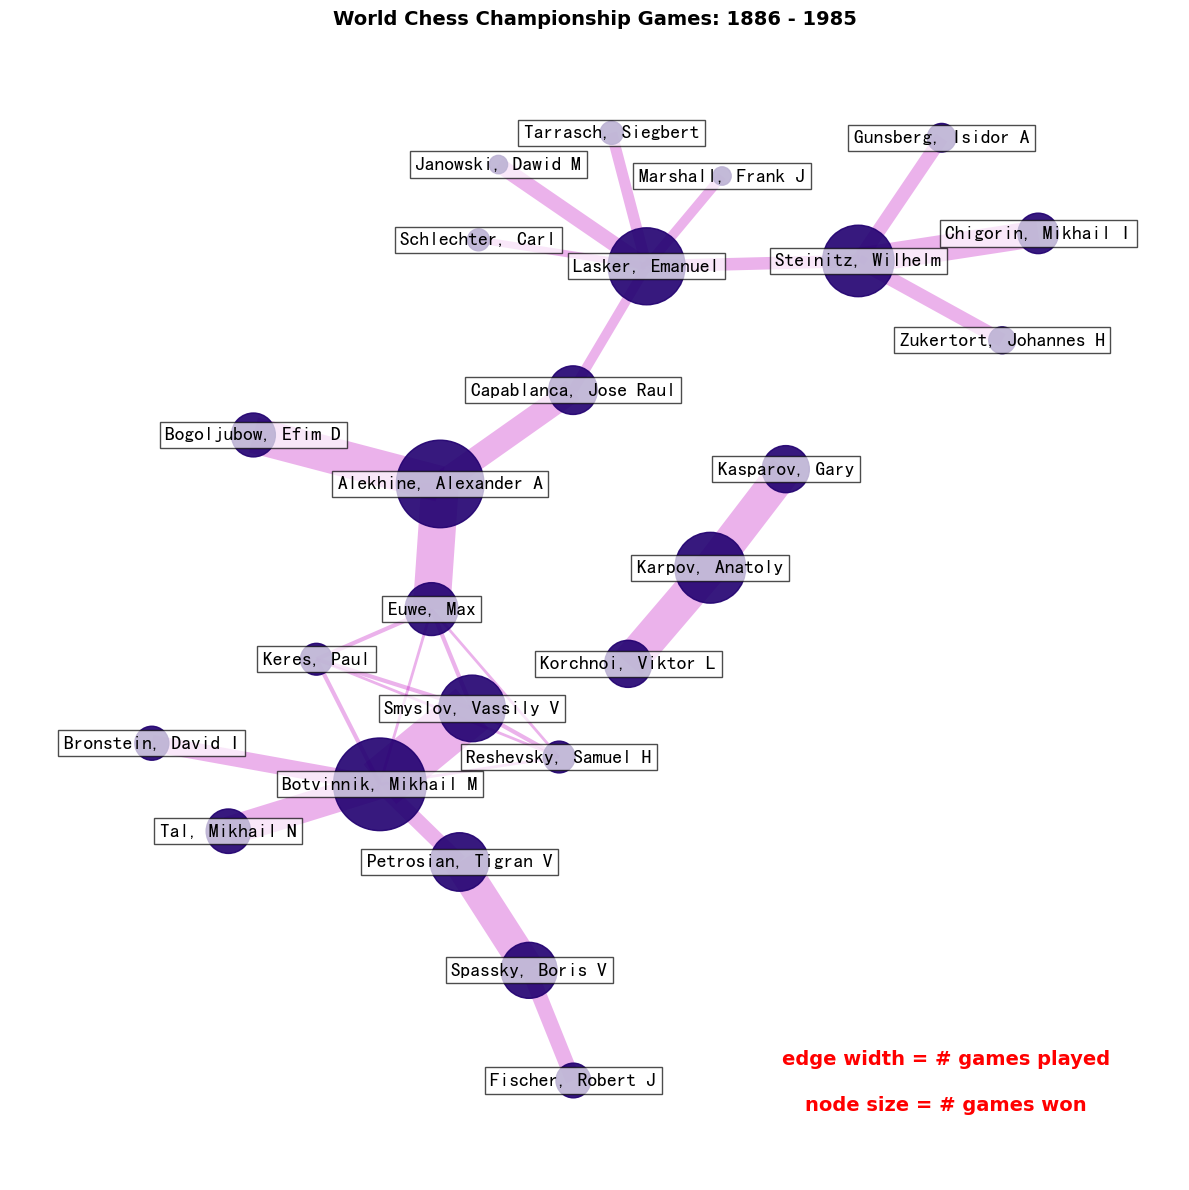

In [98]:
fig, ax = plt.subplots(figsize=(12, 12))
# Visualize graph components
nx.draw_networkx_edges(H, pos, alpha=0.3, width=edgewidth, edge_color="m")
nx.draw_networkx_nodes(H, pos, node_size=nodesize, node_color="#210070", alpha=0.9)
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(H, pos, font_size=14, bbox=label_options)

# Title/legend
font = {"fontname": "Helvetica", "color": "k", "fontweight": "bold", "fontsize": 14}
ax.set_title("World Chess Championship Games: 1886 - 1985", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "edge width = # games played",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = # games won",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readability
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()